In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

from model_activations.models.utils import load_full_identifier, find_best_layer_iden
from model_activations.models.configs import model_cfg, analysis_cfg
from plotting_tools import *
from config import CACHE

R_VALUES_PATH = os.path.join(CACHE, 'bootstrap_r_values')
MULTIPLIER = 36

def load_and_prepare_data(model_name, multiplier, region):
    all_data = []
    filepath = os.path.join(R_VALUES_PATH, model_name + '_' + region + '.pkl')
    with open(filepath, 'rb') as file:
        df = pickle.load(file)
    df['model'] = model_name
    df['features'] = df['features'].apply(lambda x: int(x) * multiplier)
    df['score'] = df['score'].astype(np.float32)
    return df

/data/shared/miniconda3/envs/bonnerlab/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/shared/miniconda3/envs/bonnerlab/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
DATASET = 'majajhong' # one of ['majajhong', 'naturalscenes']
region = 'IT' # for majajhong: IT, for naturalscenes: ventral visual stream

In [4]:
# loading linear model data
df = load_and_prepare_data('init_types', MULTIPLIER, region)

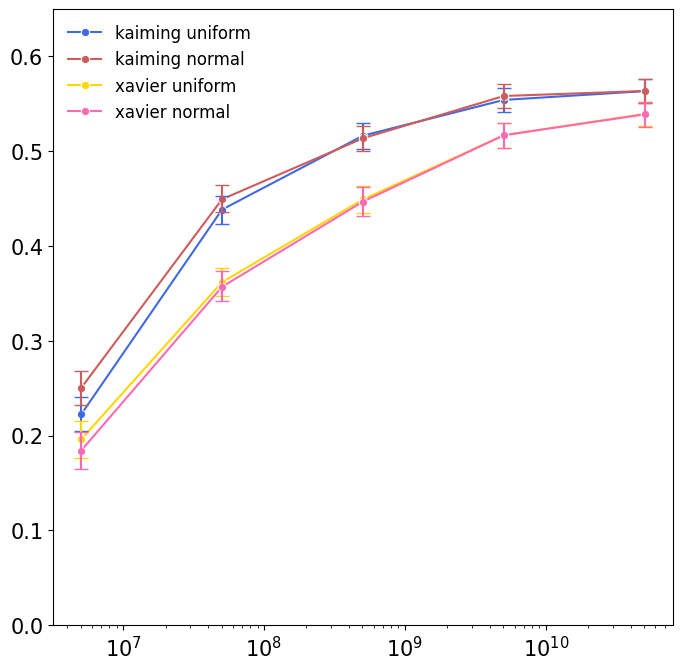

In [9]:
palette = {         
    'kaiming uniform':'royalblue',
    'kaiming normal':'indianred',
    'xavier uniform':'gold',
    'orthogonal':'mediumseagreen',
    'xavier normal':'hotpink'
}
df['features'] = df['features'].apply(lambda x: int(x)*36)
df['init_type'] = df['init_type'].apply(lambda x: x.replace('_',' '))
df['color'] = df['init_type'].map(palette)


rcParams['figure.figsize'] = (8,8)  

# main plot
ax1 = sns.lineplot(data = df, x='features', y='score', hue='init_type', marker='o',palette = palette)

# adding error bars for the 95% confidence interval
for i in range(len(df)):
    plt.errorbar(df['features'][i], df['score'][i], 
                 yerr=[[df['score'][i] - df['lower'][i]], 
                       [df['upper'][i] - df['score'][i]]], 
                 fmt='none', capsize=5, color=df['color'][i])
plt.xlabel('')
plt.ylabel('')
plt.ylim(0,0.65) if region == 'IT' else plt.ylim(0,0.3)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")    
ax1.legend(frameon=False,fontsize=12)
plt.savefig(f'manuscript_figures/figure_s3_{DATASET}_{region}.png', dpi=200) 
plt.show()